Detected faces: [{'box': [164, 19, 99, 127], 'confidence': np.float64(0.9998413324356079), 'keypoints': {'nose': [np.int64(211), np.int64(97)], 'mouth_right': [np.int64(238), np.int64(109)], 'right_eye': [np.int64(225), np.int64(64)], 'left_eye': [np.int64(186), np.int64(79)], 'mouth_left': [np.int64(205), np.int64(121)]}}]


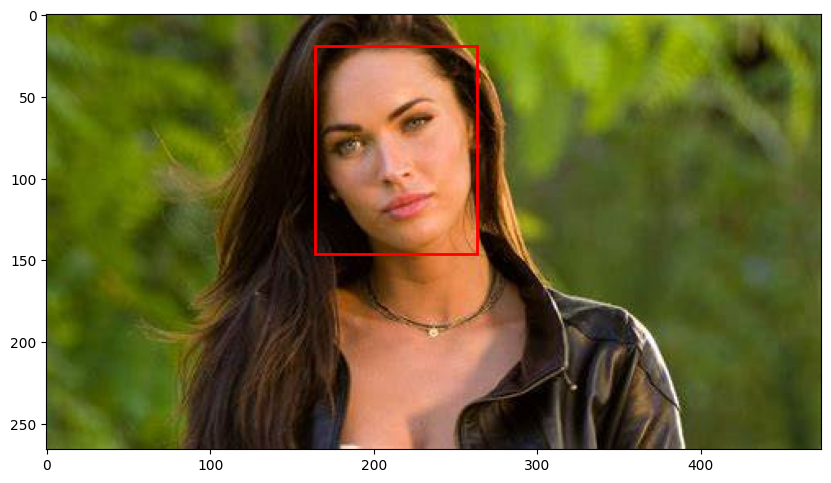

Face 1 flattened and normalized data: [0.24313726 0.18431373 0.10980392 ... 0.79607844 0.45882353 0.32156864]


In [1]:
from mtcnn import MTCNN
# from deepface import DeepFace
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Initialize MTCNN
detector = MTCNN()

# Load a sample image
image = Image.open("./Dataset/Megan Fox/mf1.jpg")  # Make sure the path to your image is correct
# image2 = Image.open("./Dataset/Megan Fox/OIP(1).jpg")
image_array = np.array(image)

# Detect faces
faces = detector.detect_faces(image_array)
print("Detected faces:", faces)

# Plot the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# Initialize list for flattened and normalized faces
flattened_faces = []

# Draw bounding boxes around the detected faces and extract the face regions
for face in faces:
    x, y, width, height = face['box']
    
    # Draw the bounding box on the image
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    # Extract the face region
    face_region = image_array[y:y+height, x:x+width]
    
    # Normalize the face region (scale pixel values to the range [0, 1])
    face_region_normalized = face_region.astype('float32') / 255.0
    
    # Flatten the face region (convert 2D array to 1D vector)
    face_region_flattened = face_region_normalized.flatten()
    
    # Append the flattened face region to the list
    flattened_faces.append(face_region_flattened)

# Show the plot with bounding boxes
plt.show()

# Print the flattened and normalized face data
for idx, flattened_face in enumerate(flattened_faces):
    print(f"Face {idx+1} flattened and normalized data: {flattened_face}")


Detected faces: [{'box': [545, 422, 739, 992], 'confidence': np.float64(0.997298538684845), 'keypoints': {'nose': [np.int64(841), np.int64(1051)], 'mouth_right': [np.int64(1092), np.int64(1114)], 'right_eye': [np.int64(1020), np.int64(816)], 'left_eye': [np.int64(700), np.int64(857)], 'mouth_left': [np.int64(747), np.int64(1165)]}}]


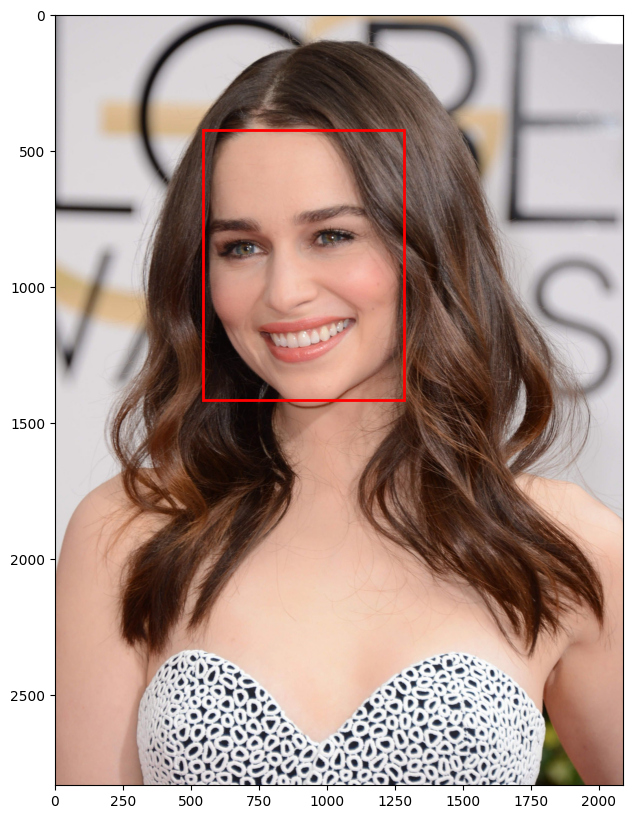

Face 1 flattened and normalized data: [0.3372549  0.26666668 0.22745098 ... 0.44313726 0.29411766 0.21960784]


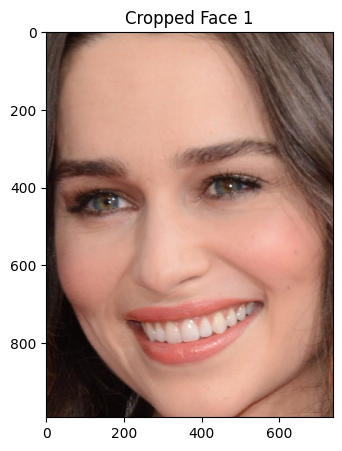

In [2]:
from mtcnn import MTCNN
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Initialize MTCNN
detector = MTCNN()

# Load a sample image
image = Image.open("./Dataset/Emilia Clarke/img1.jpg")  # Make sure the path to your image is correct
image_array = np.array(image)

# Detect faces
faces = detector.detect_faces(image_array)
print("Detected faces:", faces)

# Plot the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# Initialize list for cropped, flattened, and normalized faces
cropped_faces = []
flattened_faces = []

# Draw bounding boxes around the detected faces and extract the face regions
for face in faces:
    x, y, width, height = face['box']
    
    # Draw the bounding box on the image
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    # Crop the face region from the image
    face_cropped = image_array[y:y+height, x:x+width]
    
    # Convert the cropped face region to an Image object
    cropped_face_image = Image.fromarray(face_cropped)
    
    # Normalize the face region (scale pixel values to the range [0, 1])
    face_cropped_normalized = face_cropped.astype('float32') / 255.0
    
    # Flatten the face region (convert 2D array to 1D vector)
    face_cropped_flattened = face_cropped_normalized.flatten()
    
    # Append the cropped and flattened face to the lists
    cropped_faces.append(cropped_face_image)
    flattened_faces.append(face_cropped_flattened)

# Show the plot with bounding boxes
plt.show()

# Print the flattened and normalized face data
for idx, flattened_face in enumerate(flattened_faces):
    print(f"Face {idx+1} flattened and normalized data: {flattened_face}")

# Optionally, display the cropped faces
for idx, cropped_face in enumerate(cropped_faces):
    plt.figure(figsize=(5, 5))
    plt.imshow(cropped_face)
    plt.title(f"Cropped Face {idx+1}")
    plt.show()
